<a href="https://colab.research.google.com/github/jae-gyeong/marchine_learning_start/blob/master/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_%EB%AA%A8%EB%8D%B8%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [0]:
import pandas as pd

In [0]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 데이터 탐색하기
- 데이터의 행과 열( shape )
- 컬럼명 확인
- 각 컬럼의 자료형
- 컬럼 결측치의 확인

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [4]:
print(train.columns)
print(test.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


train에 Survived가 있고, test에는 없다.

In [5]:
train.dtypes   # int, object, float 형태의 자료형이 있다.

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 모델 만들고 제출해 보기
- 모듈을 import(불러오기)을 이용하여 sklearn(Scikit-Learn)
- 모델(로지스틱 회귀)을 생성 후, 학습(fit)
- 그리고 예측(predict)을 수행 후, 제출한다.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# 데이터 준비 - 빠른 모델 생성을 위해 처리 없이 가능한 변수만 선택
# 'Survived'를 제외 , 
# 'Embarked', 'Sex'',Name', 'Ticket' =>문자포함
#  'Age',
sel = ['PassengerId', 'Pclass', 'SibSp', 'Parch' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [0]:
model = KNeighborsClassifier()

In [16]:
# 학습
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# 예측하기 

In [17]:
predictions = model.predict(X_test)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [24]:
# 제출
sub = pd.read_csv("gender_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [25]:
sub['Survived'] = predictions
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [0]:
sub.to_csv("knn_first_model.csv", index=False)

# 로지스틱 모델 만들기

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
model2 = LogisticRegression()

In [31]:
# 학습
model2.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# 예측하기

In [34]:
predictions = model2.predict(X_test)
predictions[:15]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1])

In [36]:
sub = pd.read_csv("gender_submission.csv")
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [37]:
sub['Survived'] = predictions
sub.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [0]:
sub.to_csv("logistic_first_model.csv", index=False)

# 의사 결정 트리

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [48]:
# 예측
predictions3 = decisiontree.predict(X_test)
predictions3[:15]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1])

In [50]:
sub3 = pd.read_csv("gender_submission.csv")
sub3.head(15)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [51]:
sub3['Survived'] = predictions3
sub3.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,1
8,900,0
9,901,0


In [0]:
sub.to_csv("tree_first_model.csv", index=False)

# 결측치 처리

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

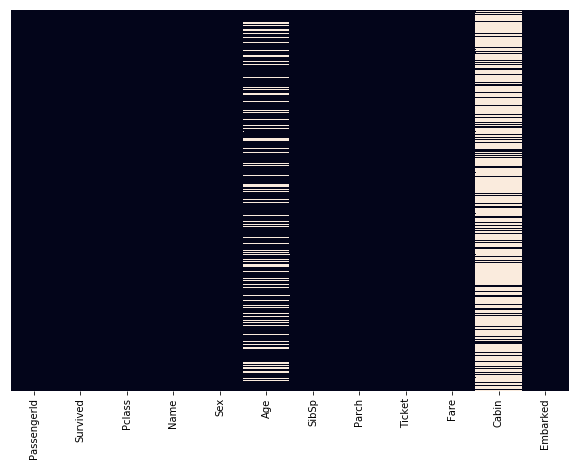

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

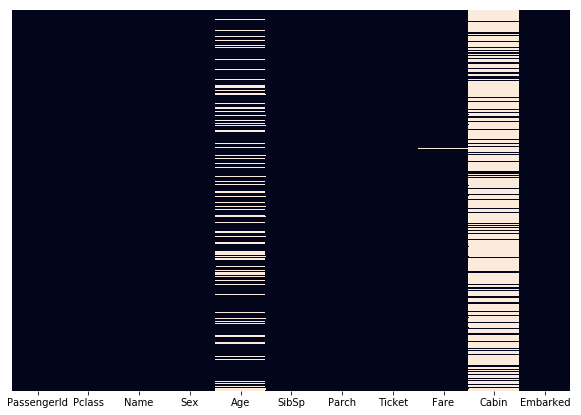

In [55]:
plt.figure(figsize=(10,7))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

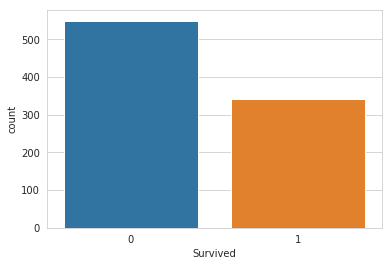

In [56]:
# 생존자 사망자의 비율이 얼마나 될까?
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train)

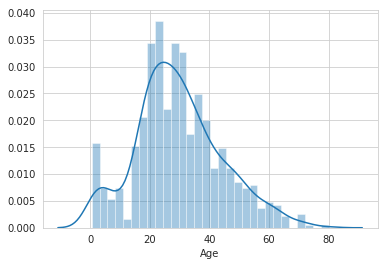

In [57]:
# 나이에 대해 살펴보자
sns.distplot(train['Age'].dropna(), bins=30)

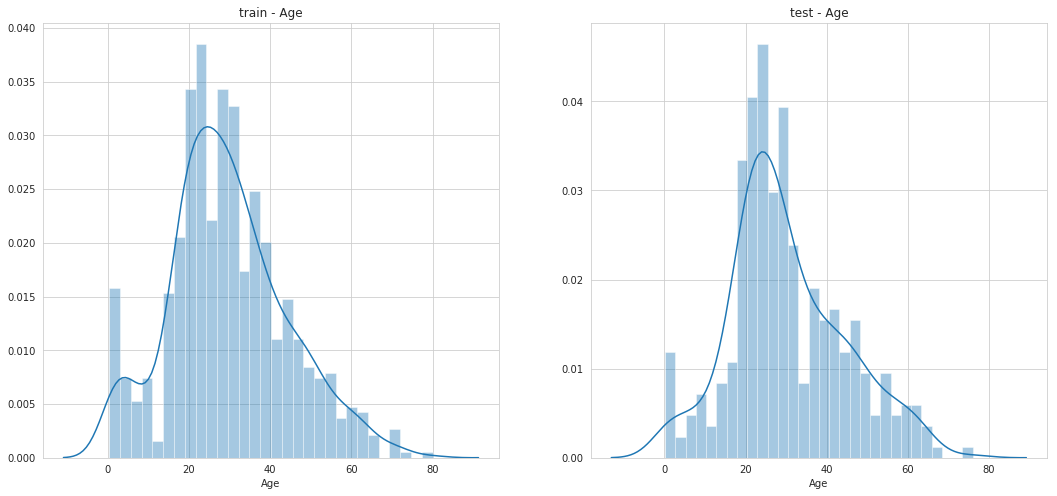

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30,ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30,ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

In [0]:
#결측치 처리 첫번째 - 나이는 평균값으로
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())


In [60]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [0]:
# 결측치 처리 두번째 Embarked(승선항)

In [62]:
val_Embarked = train['Embarked'].value_counts()
val_Embarked

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [0]:
train['Embarked'] = train['Embarked'].fillna('S')

In [0]:
# Test 데이터 - 결측치 처리 세번째(Fare)
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [65]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [0]:
# 데이터 전처리

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [68]:
print( train['Sex'].value_counts() )
print( train['Embarked'].value_counts() )

male      577
female    314
Name: Sex, dtype: int64
S    646
C    168
Q     77
Name: Embarked, dtype: int64


In [0]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)  # 라벨 인코딩
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)    

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [0]:
## 나이에 대한 int 처리
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

In [71]:
print(train.columns)
print(train.info())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null int64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 83.6+ KB
None


In [0]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'SibSp','Parch', 'Embarked' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

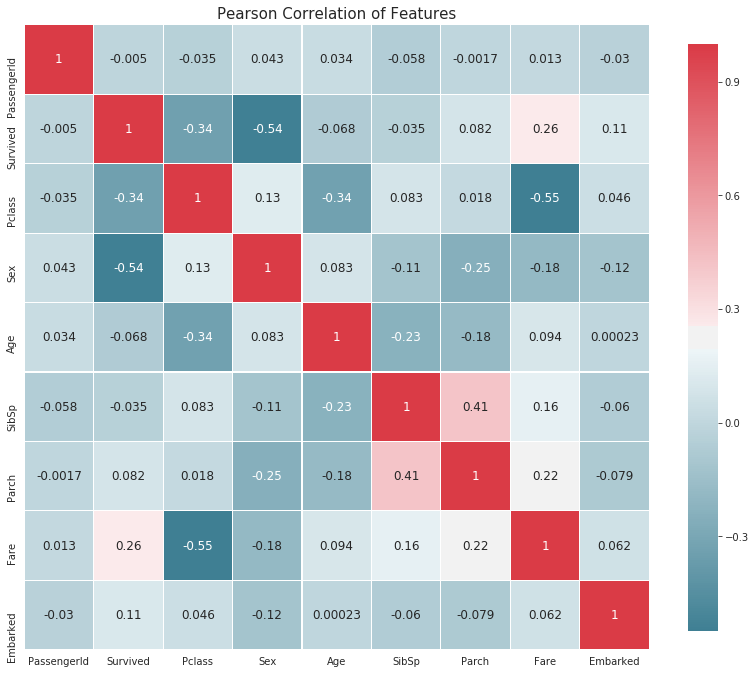

In [73]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(train)

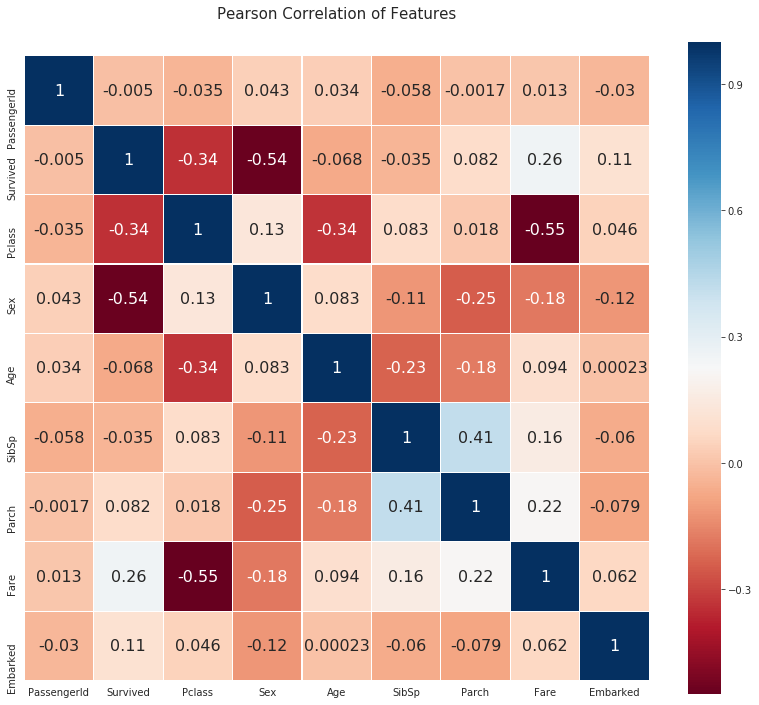

In [74]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

In [78]:
# 의사 결정 다시
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
# 예측
predictions3 = decisiontree.predict(X_test)
predictions3[:15]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1])

In [0]:
test_passengerId = test['PassengerId']
pred3 = predictions3.astype(int)
df_pred3 = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred3})
df_pred3.to_csv("decision_first_model.csv", index=False)

In [0]:
# 'Name', 'Ticket' =>  문자포함
sel = ['PassengerId', 'Pclass', 'Sex', 'Age','Parch', 'Embarked', 'Fare' ]

# 학습에 사용될 데이터 준비 X_train, y_train
X_train = train[sel]
y_train = train['Survived']
X_test = test[sel]

In [94]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train, y_train)
# 예측
predictions3 = decisiontree.predict(X_test)
predictions3[:15]

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1])

In [0]:
test_passengerId = test['PassengerId']
pred3 = predictions3.astype(int)
df_pred3 = pd.DataFrame({'PassengerID':test_passengerId, 'Survived':pred3})
df_pred3.to_csv("decision_second_model2.csv", index=False)